In [1]:
import json
import os
import glob
import re
import pandas as pd
from tqdm import tqdm

In [2]:
gpt_decisions_path = '/srv/local/data/jp65/gpt-35-decisions'

# get list of .json files in gpt_decisions_path
json_files = glob.glob(os.path.join(gpt_decisions_path, '*.json'))
print(f'Found {len(json_files)} .json files in {gpt_decisions_path}')

# get list of text files in gpt_decisions_path
txt_files = glob.glob(os.path.join(gpt_decisions_path, '*.txt'))
print(f'Found {len(txt_files)} .txt files in {gpt_decisions_path}')


Found 163473 .json files in /srv/local/data/jp65/gpt-35-decisions
Found 519 .txt files in /srv/local/data/jp65/gpt-35-decisions


In [3]:
# read and print a json file
with open(json_files[0], 'r') as f:
    print(json_files[0])
    data = json.load(f)
    print(json.dumps(data, indent=4))

# #get list of main keys in json file
main_keys = list(data.keys())
print(f'Main keys in json file: {main_keys}')




/srv/local/data/jp65/gpt-35-decisions/NCT01844752_gpt_response.json
{
    "description": "The trial compared the efficacy, tolerability, and safety of two concentrations of NVN1000 Gel and Vehicle Gel twice daily in the treatment of Acne Vulgaris. Both concentrations of NVN1000 Gel significantly decreased the percentage of noninflammatory lesions, and the higher concentration also significantly decreased the percentage of inflammatory lesions. The treatment was found to be safe and well-tolerated.",
    "extracted features": [
        {
            "description": "Study Design",
            "value": "Randomized, evaluator-blinded, vehicle-controlled, parallel group, 3-arm study"
        },
        {
            "description": "Number of Participants",
            "value": 153
        },
        {
            "description": "Primary Efficacy Assessment",
            "value": "Absolute change in noninflammatory lesion counts"
        },
        {
            "description": "Other Assessm

# extracting outcomes, features and questions only from the jsons

In [4]:
# get top 2 pubmed abstracts used
pudmed_data_path = '/home/jp65/CTOD/results/top_2_extracted_pubmed_articles.csv'

top2_pubmed_pd = pd.read_csv(pudmed_data_path)
print(top2_pubmed_pd.shape)
top2_pubmed_pd.head()


(163992, 25)


,nct_id,official_title,start_date,completion_date,top_1_similar_article_title,top_1_similar_article_abstract,top_1_similar_article_pub_date,top_1_similar_article_similarity_score,top_1_similar_article_type,top_1_similar_article_journal,...,result,top_2_similar_article_title,top_2_similar_article_abstract,top_2_similar_article_pub_date,top_2_similar_article_similarity_score,top_2_similar_article_type,top_2_similar_article_journal,top_2_similar_article_PMID,top_2_similar_article_PMCID,top_2_similar_article_author_affiliation
0,NCT01844752,"A Multi-Center, Randomized, Evaluator-Blinded,...",2013-04-30,2013-11-30,Results of a Phase 2 Efficacy and Safety Study...,"OBJECTIVE: To compare efficacy, tolerability, ...",2016 Aug,0.987667,derived,The Journal of clinical and aesthetic dermatology,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCT01844804,"Phase 1, Double Blind, Randomized, Parallel-Gr...",2013-05-31,2013-11-30,A randomized study comparing the pharmacokinet...,BACKGROUND: To demonstrate pharmacokinetic (PK...,2018 Apr,0.981130,derived,Expert review of clinical immunology,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NCT01844843,Evaluation With OFDI of Strut Coverage of Teru...,2014-01-31,2016-06-30,Serial Assessment of Strut Coverage of Biodegr...,BACKGROUND: To assess the vessel-healing patte...,2017 Dec,0.989426,derived,Circulation. Cardiovascular interventions,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NCT01844882,The Effects of Dietary Fiber on Uremic Retenti...,2012-01-31,2013-08-31,Dietary fiber effects in chronic kidney diseas...,BACKGROUND/OBJECTIVES: Chronic kidney disease ...,2015 Jul,0.991876,derived,European journal of clinical nutrition,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCT01844947,An Exploratory Phase I Study With Sorafenib in...,2012-05-31,2018-06-05,Safety and Activity of Sorafenib in Addition t...,LESSONS LEARNED: First trial to report safety ...,2019 Jun,0.988371,derived,The oncologist,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# for each trial in the pubmed pd, extract trial outcome from json file
# concat trial outcome to pubmed pd
# save to new csv

# create a new dataframe with trial nct ids and outcomes
gpt_trial_outcomes = pd.DataFrame(columns=['nct_id', 'outcome'])

for trial in tqdm(top2_pubmed_pd['nct_id'].values):
    # print(trial)
    if os.path.exists(os.path.join(gpt_decisions_path,f'{trial}_gpt_response.json')):
        with open(os.path.join(gpt_decisions_path,f'{trial}_gpt_response.json'), 'r') as f:
            json_data = json.load(f)
            f.close()
        
        # extract trial outcome
        trial_outcome = json_data['outcome']
        # print(trial_outcome)
        
        # add to gpt_trial_outcomes using concat
        gpt_trial_outcomes = pd.concat([gpt_trial_outcomes, pd.DataFrame({'nct_id': [trial], 'outcome': [trial_outcome]})])
        # gpt_trial_outcomes = gpt_trial_outcomes.append({'nct_id': trial, 'outcome': trial_outcome}, ignore_index=True)
    # else:
    #     gpt_trial_outcomes = pd.concat([gpt_trial_outcomes, pd.DataFrame({'nct_id': [trial], 'outcome': [None]})])
    # break
            
    
# top2_pubmed_pd.head()

#

100%|██████████| 163992/163992 [02:56<00:00, 927.64it/s]


In [6]:
# merge top2_pubmed_pd with gpt_trial_outcomes on nct_id 
merged_pd = pd.merge(top2_pubmed_pd,gpt_trial_outcomes,  on='nct_id', how='left')
print(merged_pd.shape)
print(merged_pd.isna().sum())
merged_pd.head()

(163992, 26)
nct_id                                           0
official_title                                   0
start_date                                    1293
completion_date                               4248
top_1_similar_article_title                  56489
top_1_similar_article_abstract               57907
top_1_similar_article_pub_date               56487
top_1_similar_article_similarity_score       55487
top_1_similar_article_type                   55487
top_1_similar_article_journal                56492
top_1_similar_article_PMID                   56487
top_1_similar_article_PMCID                 106752
top_1_similar_article_author_affiliation     58191
background                                       0
derived                                          0
result                                           0
top_2_similar_article_title                 130798
top_2_similar_article_abstract              131638
top_2_similar_article_pub_date              130793
top_2_similar_arti

,nct_id,official_title,start_date,completion_date,top_1_similar_article_title,top_1_similar_article_abstract,top_1_similar_article_pub_date,top_1_similar_article_similarity_score,top_1_similar_article_type,top_1_similar_article_journal,...,top_2_similar_article_title,top_2_similar_article_abstract,top_2_similar_article_pub_date,top_2_similar_article_similarity_score,top_2_similar_article_type,top_2_similar_article_journal,top_2_similar_article_PMID,top_2_similar_article_PMCID,top_2_similar_article_author_affiliation,outcome
0,NCT01844752,"A Multi-Center, Randomized, Evaluator-Blinded,...",2013-04-30,2013-11-30,Results of a Phase 2 Efficacy and Safety Study...,"OBJECTIVE: To compare efficacy, tolerability, ...",2016 Aug,0.987667,derived,The Journal of clinical and aesthetic dermatology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success
1,NCT01844804,"Phase 1, Double Blind, Randomized, Parallel-Gr...",2013-05-31,2013-11-30,A randomized study comparing the pharmacokinet...,BACKGROUND: To demonstrate pharmacokinetic (PK...,2018 Apr,0.981130,derived,Expert review of clinical immunology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success
2,NCT01844843,Evaluation With OFDI of Strut Coverage of Teru...,2014-01-31,2016-06-30,Serial Assessment of Strut Coverage of Biodegr...,BACKGROUND: To assess the vessel-healing patte...,2017 Dec,0.989426,derived,Circulation. Cardiovascular interventions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success
3,NCT01844882,The Effects of Dietary Fiber on Uremic Retenti...,2012-01-31,2013-08-31,Dietary fiber effects in chronic kidney diseas...,BACKGROUND/OBJECTIVES: Chronic kidney disease ...,2015 Jul,0.991876,derived,European journal of clinical nutrition,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success
4,NCT01844947,An Exploratory Phase I Study With Sorafenib in...,2012-05-31,2018-06-05,Safety and Activity of Sorafenib in Addition t...,LESSONS LEARNED: First trial to report safety ...,2019 Jun,0.988371,derived,The oncologist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success


In [7]:
# rename background column to num_of_background_pubs, similar for derived and result
merged_pd.rename(columns={'background': 'num_of_background_pubs', 'derived': 'num_of_derived_pubs', 'result': 'num_of_result_pubs','nct_id':'nctid'}, inplace=True)


print(merged_pd.shape)
print(merged_pd.isna().sum())
merged_pd.head()

(163992, 26)
nctid                                            0
official_title                                   0
start_date                                    1293
completion_date                               4248
top_1_similar_article_title                  56489
top_1_similar_article_abstract               57907
top_1_similar_article_pub_date               56487
top_1_similar_article_similarity_score       55487
top_1_similar_article_type                   55487
top_1_similar_article_journal                56492
top_1_similar_article_PMID                   56487
top_1_similar_article_PMCID                 106752
top_1_similar_article_author_affiliation     58191
num_of_background_pubs                           0
num_of_derived_pubs                              0
num_of_result_pubs                               0
top_2_similar_article_title                 130798
top_2_similar_article_abstract              131638
top_2_similar_article_pub_date              130793
top_2_similar_arti

,nctid,official_title,start_date,completion_date,top_1_similar_article_title,top_1_similar_article_abstract,top_1_similar_article_pub_date,top_1_similar_article_similarity_score,top_1_similar_article_type,top_1_similar_article_journal,...,top_2_similar_article_title,top_2_similar_article_abstract,top_2_similar_article_pub_date,top_2_similar_article_similarity_score,top_2_similar_article_type,top_2_similar_article_journal,top_2_similar_article_PMID,top_2_similar_article_PMCID,top_2_similar_article_author_affiliation,outcome
0,NCT01844752,"A Multi-Center, Randomized, Evaluator-Blinded,...",2013-04-30,2013-11-30,Results of a Phase 2 Efficacy and Safety Study...,"OBJECTIVE: To compare efficacy, tolerability, ...",2016 Aug,0.987667,derived,The Journal of clinical and aesthetic dermatology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success
1,NCT01844804,"Phase 1, Double Blind, Randomized, Parallel-Gr...",2013-05-31,2013-11-30,A randomized study comparing the pharmacokinet...,BACKGROUND: To demonstrate pharmacokinetic (PK...,2018 Apr,0.981130,derived,Expert review of clinical immunology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success
2,NCT01844843,Evaluation With OFDI of Strut Coverage of Teru...,2014-01-31,2016-06-30,Serial Assessment of Strut Coverage of Biodegr...,BACKGROUND: To assess the vessel-healing patte...,2017 Dec,0.989426,derived,Circulation. Cardiovascular interventions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success
3,NCT01844882,The Effects of Dietary Fiber on Uremic Retenti...,2012-01-31,2013-08-31,Dietary fiber effects in chronic kidney diseas...,BACKGROUND/OBJECTIVES: Chronic kidney disease ...,2015 Jul,0.991876,derived,European journal of clinical nutrition,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success
4,NCT01844947,An Exploratory Phase I Study With Sorafenib in...,2012-05-31,2018-06-05,Safety and Activity of Sorafenib in Addition t...,LESSONS LEARNED: First trial to report safety ...,2019 Jun,0.988371,derived,The oncologist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,success


In [8]:
# save csv file
merged_pd['outcome'] = merged_pd['outcome'].map({'unsure': 'Not sure', 'Unsure': 'Not sure', 'success': 'Success', 'Success': 'Success', 'partial success': 'Success', 'Fail': 'Failure', 'fail': 'Failure', 'failure': 'Failure'})
merged_pd.to_csv('/home/jp65/CTOD/results/final_data_for_benchmark/GPT_Pubmed_abstracts/pubmed_gpt_outcomes.csv', index=False)


## Analysis GPT Decisions

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from pyhealth.metrics import binary_metrics_fn


In [37]:
gpt_outcome_path = '/home/jp65/CTOD/results/final_data_for_benchmark/GPT_Pubmed_abstracts/pubmed_gpt_outcomes.csv'

gpt_outcome_pd = pd.read_csv(gpt_outcome_path)

# add another column with sum of num_of_background_pubs, num_of_derived_pubs, num_of_result_pubs
gpt_outcome_pd['total_num_of_pubs'] = gpt_outcome_pd['num_of_background_pubs'] + gpt_outcome_pd['num_of_derived_pubs'] + gpt_outcome_pd['num_of_result_pubs']

# get statistics on outcomes
print(gpt_outcome_pd['outcome'].value_counts())
print(gpt_outcome_pd.columns, gpt_outcome_pd.shape)
#get duplicates count
print(gpt_outcome_pd.duplicated().sum())

Not sure    87664
Success     69831
Failure      5978
Name: outcome, dtype: int64
Index(['nctid', 'official_title', 'start_date', 'completion_date',
       'top_1_similar_article_title', 'top_1_similar_article_abstract',
       'top_1_similar_article_pub_date',
       'top_1_similar_article_similarity_score', 'top_1_similar_article_type',
       'top_1_similar_article_journal', 'top_1_similar_article_PMID',
       'top_1_similar_article_PMCID',
       'top_1_similar_article_author_affiliation', 'num_of_background_pubs',
       'num_of_derived_pubs', 'num_of_result_pubs',
       'top_2_similar_article_title', 'top_2_similar_article_abstract',
       'top_2_similar_article_pub_date',
       'top_2_similar_article_similarity_score', 'top_2_similar_article_type',
       'top_2_similar_article_journal', 'top_2_similar_article_PMID',
       'top_2_similar_article_PMCID',
       'top_2_similar_article_author_affiliation', 'outcome',
       'total_num_of_pubs'],
      dtype='object')
0


[[2.21456087 1.0608469  0.73023442 4.00564219]
 [1.12278354 1.24138508 0.5142188  2.87838742]
 [4.9620825  0.52738867 0.71760358 6.20707474]]


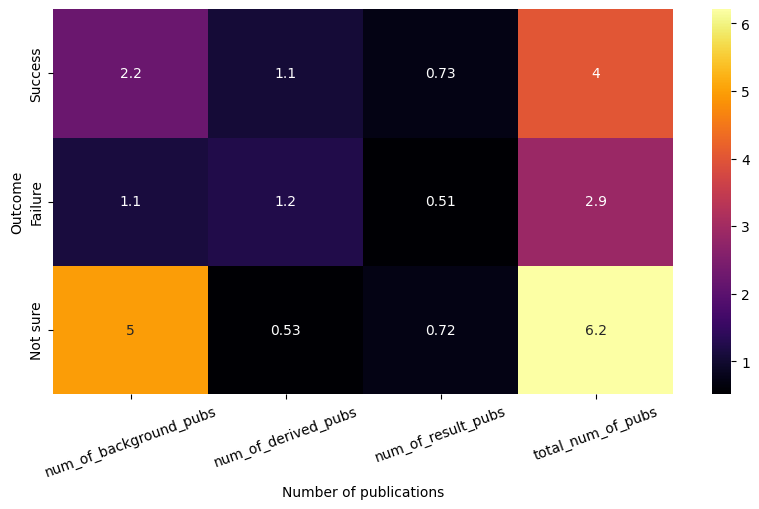

In [80]:
# Comparison of number of references with GPT decisions
# get average for num_of_background_pubs,num_of_derived_pubs, num_of_results_pubs and average total_num_of_pubs
conf_matrix = np.zeros((3,4))

out_comes = ['Success', 'Failure', 'Not sure']

for i, outcome in enumerate(out_comes):
    conf_matrix[i,0] = gpt_outcome_pd[gpt_outcome_pd['outcome'] == outcome]['num_of_background_pubs'].mean()
    conf_matrix[i,1] = gpt_outcome_pd[gpt_outcome_pd['outcome'] == outcome]['num_of_derived_pubs'].mean()
    conf_matrix[i,2] = gpt_outcome_pd[gpt_outcome_pd['outcome'] == outcome]['num_of_result_pubs'].mean()
    conf_matrix[i,3] = gpt_outcome_pd[gpt_outcome_pd['outcome'] == outcome]['total_num_of_pubs'].mean()
    
print(conf_matrix)
#plot it as heatmap
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True,cmap='inferno')
plt.ylabel('Outcome')
plt.xlabel('Number of publications')
plt.yticks([0.5,1.5,2.5],out_comes)
plt.xticks([0.5,1.5,2.5,3.5],['num_of_background_pubs', 'num_of_derived_pubs', 'num_of_result_pubs', 'total_num_of_pubs'], rotation=20)
plt.show()


#plot the histogram of num_of_background_pubs,'num_of_derived_pubs', 'num_of_result_pubs', 'total_num_of_pubs' for each outcomes separately
# plt.figure(figsize=(10,5))
# sns.histplot(data=gpt_outcome_pd, x='num_of_background_pubs', hue='outcome', kde=True, bins=10)
# plt.title('Number of background publications for each outcome')
# plt.show()

# plt.figure(figsize=(10,5))
# sns.histplot(data=gpt_outcome_pd, x='num_of_derived_pubs', hue='outcome', kde=True, bins=10)
# plt.title('Number of derived publications for each outcome')
# plt.show()

# plt.figure(figsize=(10,5))
# sns.histplot(data=gpt_outcome_pd, x='num_of_result_pubs', hue='outcome', kde=True, bins=10)
# plt.title('Number of result publications for each outcome')
# plt.show()

# plt.figure(figsize=(10,5))
# sns.histplot(data=gpt_outcome_pd, x='total_num_of_pubs', hue='outcome', kde=True, bins=10)
# plt.title('Total number of publications for each outcome')
# plt.show()




In [39]:
# Compare with HINT Data
hint_data_path = '/home/jp65/CTOD/HINT_eval'
#read all the files in hint_data_path and concat to one dataframe
hint_data = []
tot = 0
for file in os.listdir(hint_data_path):
    if file.endswith('.csv'):
        hint_data.append(pd.read_csv(os.path.join(hint_data_path, file)))
        tot+=pd.read_csv(os.path.join(hint_data_path, file)).shape[0]
hint_data = pd.concat(hint_data).reset_index(drop=True)
hint_data.drop_duplicates(inplace=True)
print(hint_data.shape,hint_data.duplicated().sum(),tot)
hint_data.head()

(11601, 10) 0 12477


,nctid,status,why_stop,label,phase,diseases,icdcodes,drugs,smiless,criteria
0,NCT01288573,completed,NaN,1,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...
1,NCT01558674,terminated,\n lack of efficacy\n,0,phase 1,"['renal impairment', 'heart failure']","[""['M10.38', 'M10.30', 'M10.311', 'M10.312', '...","['mk-7145', 'furosemide', 'torsemide']",['CC1=C2COC(=O)C2=CC=C1[C@@H](O)CN1CCN(C[C@H](...,\n Inclusion Criteria:\n\n Parts...
2,NCT01575782,terminated,\n poor accrual\n,0,phase 1,['small cell lung cancer'],"[""['C78.00', 'C78.01', 'C78.02', 'D14.30', 'D1...",['chloroquine'],['CCN(CC)CCCC(C)NC1=C2C=CC(Cl)=CC2=NC=C1'],\n Inclusion Criteria:\n\n - ...
3,NCT01609816,terminated,\n low accrual. no analyses were performed\n,0,phase 1,"[""non-hodgkin's lymphoma"", 'multiple', 'mycosi...","[""['S33.110S', 'S33.111S', 'S33.120S', 'S33.12...",['dasatinib'],['CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(C)C=CC=C2Cl)=C...,\n Inclusion Criteria:\n\n - ...
4,NCT01657760,completed,NaN,1,phase 1,['alcohol dependence'],"[""['F10.20', 'F10.24', 'F10.27', 'F10.280', 'F...",['citalopram'],['CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1'],\n Inclusion Criteria:\n\n Must ...


In [83]:
def eval_gpt_decisions_HINT(gpt_outcome_pd, HINT_pd):
    '''
    phase: str, phase of the trials (phase_I, phase_II, phase_III) 
    '''
    #drop nan outcomes
    gpt_outcome_pd = gpt_outcome_pd.dropna(subset=['outcome'])
    print(gpt_outcome_pd.shape)
    #map gpt outcome to binary
    gpt_outcome_pd['outcome'] = gpt_outcome_pd['outcome'].map({'Success': 1, 'Failure': 0, 'Not sure': 1})
    
    # get common nctids
    common_nctids = set(gpt_outcome_pd['nctid'].values).intersection(set(HINT_pd['nctid'].values))
    print(f'Number of common nctids: {len(common_nctids)}')
    
    # get the common nctids from both dataframes
    gpt_outcome_pd = gpt_outcome_pd[gpt_outcome_pd['nctid'].isin(common_nctids)]
    HINT_pd = HINT_pd[HINT_pd['nctid'].isin(common_nctids)]
    # print duplicates in HINT
    
    print(len(gpt_outcome_pd),len(HINT_pd))
    
    #sort
    gpt_outcome_pd = gpt_outcome_pd.sort_values(by = 'nctid')
    gpt_outcome_pd = gpt_outcome_pd.reset_index(drop=True)
    HINT_pd = HINT_pd.sort_values(by = 'nctid')
    HINT_pd = HINT_pd.reset_index(drop=True)
    
    # assert whether both pdfs have same nctids in same order
    assert all(gpt_outcome_pd['nctid'].values == HINT_pd['nctid'].values)
    
    # get the outcome labels
    gpt_outcome_pd_val = gpt_outcome_pd['outcome'].values
    HINT_outcome = HINT_pd['label'].values
    
    # calculate the metrics (#y true , # y pred)
    results = binary_metrics_fn(HINT_outcome,gpt_outcome_pd_val, 
                                metrics=['accuracy', 'precision', 'recall', 'pr_auc','f1', 'roc_auc'])
    
    
    outcomes = [0,1]
    conf_matrix = np.zeros((2,4))
    for i, outcome in enumerate(outcomes):
        conf_matrix[i,0] = gpt_outcome_pd[HINT_outcome == outcome]['num_of_background_pubs'].mean()
        conf_matrix[i,1] = gpt_outcome_pd[HINT_outcome == outcome]['num_of_derived_pubs'].mean()
        conf_matrix[i,2] = gpt_outcome_pd[HINT_outcome == outcome]['num_of_result_pubs'].mean()
        conf_matrix[i,3] = gpt_outcome_pd[HINT_outcome == outcome]['total_num_of_pubs'].mean()
    
    print(conf_matrix)
    #plot it as heatmap
    plt.figure(figsize=(10,5))
    sns.heatmap(conf_matrix,annot=True,cmap='inferno')
    plt.title('Average number of publications per type')
    plt.ylabel('TOP benchmark outcome labels')
    plt.xlabel('Type of publications')
    plt.yticks([0.5,1.5],['Failure','Success'])
    plt.xticks([0.5,1.5,2.5,3.5],['num_of_background_pubs', 'num_of_derived_pubs', 'num_of_result_pubs', 'total_num_of_pubs'], rotation=20)
    plt.show()
    
    
    # plot the histogram of log of num_of_background_pubs,'num_of_derived_pubs', 'num_of_result_pubs', 'total_num_of_pubs' for both outcomes separately
    # plt.figure(figsize=(10,5))
    # plt.hist(np.log(gpt_outcome_pd[HINT_outcome == 0]['num_of_background_pubs'].values), bins=20, alpha=0.5, label='Failure', color='red')
    # plt.hist(np.log(gpt_outcome_pd[HINT_outcome == 1]['num_of_background_pubs'].values), bins=20, alpha=0.5, label='Success', color='blue')
    # plt.legend()
    # plt.title('num_of_background_pubs')
    # plt.show()
    
    # plt.figure(figsize=(10,5))
    # plt.hist(np.log(gpt_outcome_pd[HINT_outcome == 0]['num_of_derived_pubs'].values), bins=20, alpha=0.5, label='Failure', color='red')
    # plt.hist(np.log(gpt_outcome_pd[HINT_outcome == 1]['num_of_derived_pubs'].values), bins=20, alpha=0.5, label='Success', color='blue')
    # plt.legend()
    # plt.title('num_of_derived_pubs')
    # plt.show()
    
    # plt.figure(figsize=(10,5))
    # plt.hist(np.log(gpt_outcome_pd[HINT_outcome == 0]['num_of_result_pubs'].values), bins=20, alpha=0.5, label='Failure', color='red')
    # plt.hist(np.log(gpt_outcome_pd[HINT_outcome == 1]['num_of_result_pubs'].values), bins=20, alpha=0.5, label='Success', color='blue')
    # plt.legend()
    # plt.title('num_of_result_pubs')
    # plt.show()
    
    # plt.figure(figsize=(10,5))
    # plt.hist(np.log(gpt_outcome_pd[HINT_outcome == 0]['total_num_of_pubs'].values), bins=20, alpha=0.5, label='Failure', color='red')
    # plt.hist(np.log(gpt_outcome_pd[HINT_outcome == 1]['total_num_of_pubs'].values), bins=20, alpha=0.5, label='Success', color='blue')
    # plt.legend()
    # plt.title('total_num_of_pubs')
    # plt.show()
    
    # fig, axs = plt.subplots(2,2, figsize=(10,10))
    # sns.histplot(data=gpt_outcome_pd, x='num_of_background_pubs',bins=20, hue=HINT_outcome, ax=axs[0,0])
    # axs[0,0].set_title('num_of_background_pubs')
    # sns.histplot(data=gpt_outcome_pd, x='num_of_derived_pubs',bins=20, hue=HINT_outcome, ax=axs[0,1])
    # axs[0,1].set_title('num_of_derived_pubs')
    # sns.histplot(data=gpt_outcome_pd, x='num_of_result_pubs',bins=20, hue=HINT_outcome, ax=axs[1,0])
    # axs[1,0].set_title('num_of_result_pubs')
    # sns.histplot(data=gpt_outcome_pd, x='total_num_of_pubs',bins=20,hue=HINT_outcome, ax=axs[1,1])
    # axs[1,1].set_title('total_num_of_pubs')
    # plt.show()
    
    
    return results

(163473, 27)
Number of common nctids: 6045
6045 6045
[[1.28624535 1.07753585 0.45724907 2.82103027]
 [0.55646324 1.73618453 0.45074483 2.7433926 ]]


/tmp/ipykernel_114899/703272386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_outcome_pd['outcome'] = gpt_outcome_pd['outcome'].map({'Success': 1, 'Failure': 0, 'Not sure': 1})


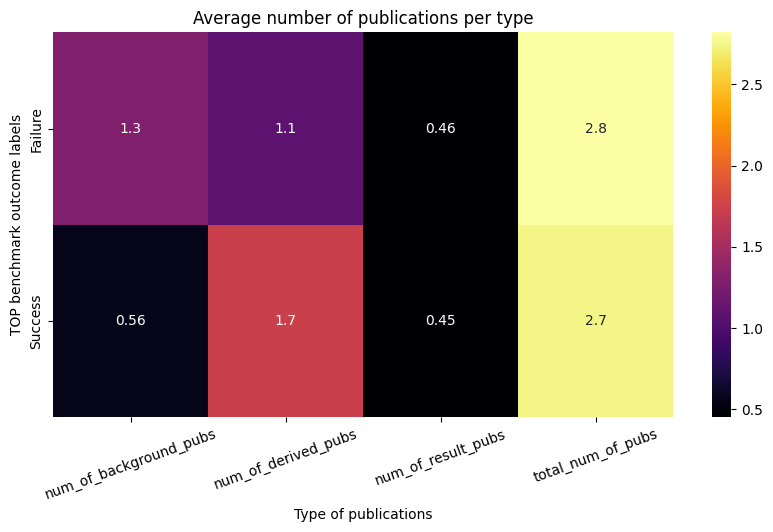

{'accuracy': 0.7932175351530191, 'precision': 0.7767008741923224, 'recall': 0.9819798173954829, 'pr_auc': 0.7751115305011075, 'f1': 0.8673599320882852, 'roc_auc': 0.6789877844279592}


In [84]:
# Results comparing GPT decisions and HINT
results = eval_gpt_decisions_HINT(gpt_outcome_pd, hint_data)
print(results)

In [42]:
gpt_outcome_pd.shape

(163992, 27)

In [61]:
def get_3x_confusion_matrix_gpt_decisions(gpt_outcome_pd, HINT_pd):
    '''
    phase: str, phase of the trials (phase_I, phase_II, phase_III) 
    '''
    #drop nan outcomes
    gpt_outcome_pd = gpt_outcome_pd.dropna(subset=['outcome'])
    print(gpt_outcome_pd.shape)
    #map gpt outcome to binary
    
    # get common nctids
    common_nctids = set(gpt_outcome_pd['nctid'].values).intersection(set(HINT_pd['nctid'].values))
    print(f'Number of common nctids: {len(common_nctids)}')
    
    # get the common nctids from both dataframes
    gpt_outcome_pd = gpt_outcome_pd[gpt_outcome_pd['nctid'].isin(common_nctids)]
    HINT_pd = HINT_pd[HINT_pd['nctid'].isin(common_nctids)]
    # print duplicates in HINT
    
    print(len(gpt_outcome_pd),len(HINT_pd))
    
    #sort
    gpt_outcome_pd = gpt_outcome_pd.sort_values(by = 'nctid')
    gpt_outcome_pd = gpt_outcome_pd.reset_index(drop=True)
    HINT_pd = HINT_pd.sort_values(by = 'nctid')
    HINT_pd = HINT_pd.reset_index(drop=True)
    
    # assert whether both pdfs have same nctids in same order
    assert all(gpt_outcome_pd['nctid'].values == HINT_pd['nctid'].values)

    
    
    # create 2x3 confusion matrix
    confusion_matrix = np.zeros((2,3))
    
    for i in range(len(gpt_outcome_pd)):
        if gpt_outcome_pd['outcome'].iloc[i] == 'Success' and HINT_pd['label'].iloc[i] == 1:
            confusion_matrix[0,0] += 1
        elif gpt_outcome_pd['outcome'].iloc[i] == 'Not sure' and HINT_pd['label'].iloc[i] == 1:
            confusion_matrix[0,1] += 1
        elif gpt_outcome_pd['outcome'].iloc[i] == 'Failure' and HINT_pd['label'].iloc[i] == 1:
            confusion_matrix[0,2] += 1
        elif gpt_outcome_pd['outcome'].iloc[i] == 'Success' and HINT_pd['label'].iloc[i] == 0:
            confusion_matrix[1,0] += 1
        elif gpt_outcome_pd['outcome'].iloc[i] == 'Not sure' and HINT_pd['label'].iloc[i] == 0:
            confusion_matrix[1,1] += 1
        elif gpt_outcome_pd['outcome'].iloc[i] == 'Failure' and HINT_pd['label'].iloc[i] == 0:
            confusion_matrix[1,2] += 1
    
    #plot the confusion matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(confusion_matrix,annot=True,fmt='g',cmap='Blues')
    plt.ylabel('TOP Benchmark')
    plt.xlabel('GPT Decisions on PubMed abstracts')
    plt.title(f'Confusion Matrix')
    plt.yticks([0.5,1.5],['Success','Failure'])
    plt.xticks([0.5,1.5,2.5],['Success','Not sure','Failure'])
    plt.show()
    
    
    # assert
    assert np.sum(confusion_matrix) == len(gpt_outcome_pd)
    print(np.sum(confusion_matrix,axis=1).shape)
    assert np.sum(confusion_matrix,axis=1)[0] == np.sum(HINT_pd['label'].values)
    print(f'number of success in HINT: {np.sum(HINT_pd["label"].values)}')
    print(f'number of failure in HINT: {np.sum(1-HINT_pd["label"].values)}')
    print(f'number of success in trial linkage: {len(gpt_outcome_pd[gpt_outcome_pd["outcome"] == "Success"])}')
    print(f'number of not sure in trial linkage: {len(gpt_outcome_pd[gpt_outcome_pd["outcome"] == "Not sure"])}')
    print(f'number of failure in trial linkage: {len(gpt_outcome_pd[gpt_outcome_pd["outcome"] == "Failure"])}')
    
    
    
    return confusion_matrix

(163473, 27)
Number of common nctids: 6045
6045 6045


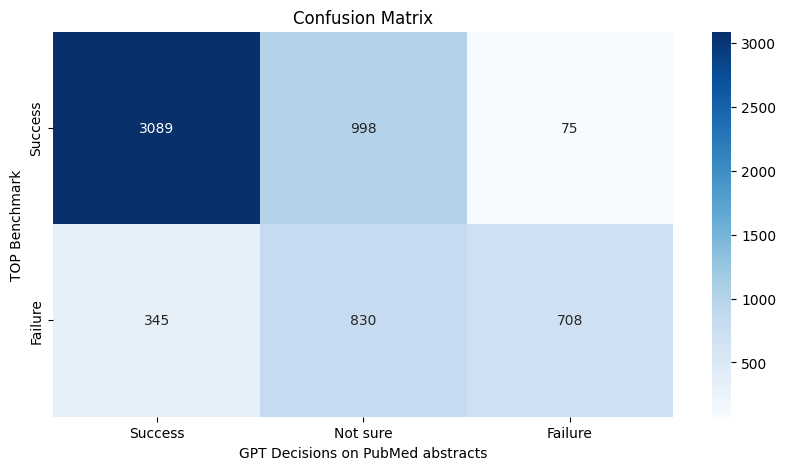

(2,)
number of success in HINT: 4162
number of failure in HINT: 1883
number of success in trial linkage: 3434
number of not sure in trial linkage: 1828
number of failure in trial linkage: 783


In [62]:
confusion_matrix = get_3x_confusion_matrix_gpt_decisions(gpt_outcome_pd, hint_data)

In [67]:
def get_2x_confusion_matrix_gpt_decisions(gpt_outcome_pd, HINT_pd):
    # consider Not sure as success
    #drop nan outcomes
    gpt_outcome_pd = gpt_outcome_pd.dropna(subset=['outcome'])
    print(gpt_outcome_pd.shape)
    #map gpt outcome to binary
    
    # get common nctids
    common_nctids = set(gpt_outcome_pd['nctid'].values).intersection(set(HINT_pd['nctid'].values))
    print(f'Number of common nctids: {len(common_nctids)}')
    
    # get the common nctids from both dataframes
    gpt_outcome_pd = gpt_outcome_pd[gpt_outcome_pd['nctid'].isin(common_nctids)]
    HINT_pd = HINT_pd[HINT_pd['nctid'].isin(common_nctids)]
    # print duplicates in HINT
    
    print(len(gpt_outcome_pd),len(HINT_pd))
    
    #sort
    gpt_outcome_pd = gpt_outcome_pd.sort_values(by = 'nctid')
    gpt_outcome_pd = gpt_outcome_pd.reset_index(drop=True)
    HINT_pd = HINT_pd.sort_values(by = 'nctid')
    HINT_pd = HINT_pd.reset_index(drop=True)
    
    # assert whether both pdfs have same nctids in same order
    assert all(gpt_outcome_pd['nctid'].values == HINT_pd['nctid'].values)

    
    
    # create 2x3 confusion matrix
    confusion_matrix = np.zeros((2,2))
    
    for i in range(len(gpt_outcome_pd)):
        if gpt_outcome_pd['outcome'].iloc[i] in ['Success', 'Not sure'] and HINT_pd['label'].iloc[i] == 1:
            confusion_matrix[0,0] += 1
        elif gpt_outcome_pd['outcome'].iloc[i] == 'Failure' and HINT_pd['label'].iloc[i] == 1:
            confusion_matrix[0,1] += 1
        elif gpt_outcome_pd['outcome'].iloc[i] in ['Success', 'Not sure'] and HINT_pd['label'].iloc[i] == 0:
            confusion_matrix[1,0] += 1
        elif gpt_outcome_pd['outcome'].iloc[i] == 'Failure' and HINT_pd['label'].iloc[i] == 0:
            confusion_matrix[1,1] += 1
    
    #plot the confusion matrix
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_matrix,annot=True,fmt='g',cmap='Blues')
    plt.ylabel('TOP Benchmark')
    plt.xlabel('GPT Decisions on PubMed abstracts')
    plt.title(f'Confusion Matrix')
    plt.yticks([0.5,1.5],['Success','Failure'])
    plt.xticks([0.5,1.5],['Success','Failure'])
    plt.show()
    
    
    # assert
    assert np.sum(confusion_matrix) == len(gpt_outcome_pd)
    print(np.sum(confusion_matrix,axis=1).shape)
    assert np.sum(confusion_matrix,axis=1)[0] == np.sum(HINT_pd['label'].values)
    print(f'number of success in HINT: {np.sum(HINT_pd["label"].values)}')
    print(f'number of failure in HINT: {np.sum(1-HINT_pd["label"].values)}')
    print(f'number of success in trial linkage: {len(gpt_outcome_pd[gpt_outcome_pd["outcome"] == "Success"])}')
    print(f'number of not sure in trial linkage: {len(gpt_outcome_pd[gpt_outcome_pd["outcome"] == "Not sure"])}')
    print(f'number of failure in trial linkage: {len(gpt_outcome_pd[gpt_outcome_pd["outcome"] == "Failure"])}')
    
    
    
    return confusion_matrix

(163473, 27)
Number of common nctids: 6045
6045 6045


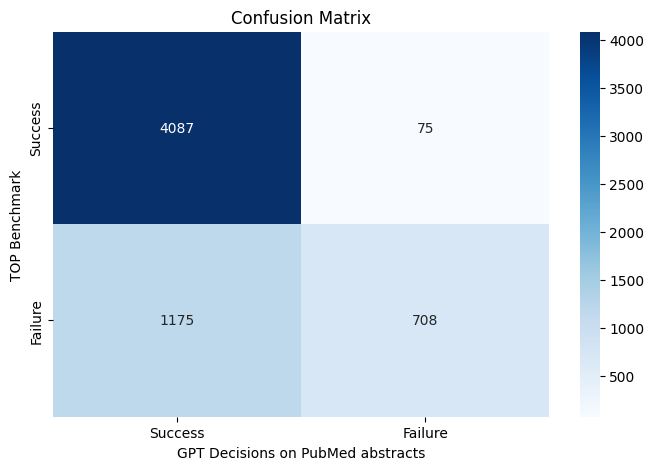

(2,)
number of success in HINT: 4162
number of failure in HINT: 1883
number of success in trial linkage: 3434
number of not sure in trial linkage: 1828
number of failure in trial linkage: 783


In [68]:
confusion_matrix = get_2x_confusion_matrix_gpt_decisions(gpt_outcome_pd, hint_data)